## SVM example with real-world data

In this example, we are using a dataset from  from UCI https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Reference:
Abreu, N. (2011). Analise do perfil do cliente Recheio e desenvolvimento de um sistema promocional. Mestrado em Marketing, ISCTE-IUL, Lisbon 

In [9]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [10]:
#1) FRESH: annual spending (m.u.) on fresh products (Continuous);
#2) MILK: annual spending (m.u.) on milk products (Continuous);
#3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
#4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
#5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
#6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
#7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
#8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)
#Descriptive Statistics:

#(Minimum, Maximum, Mean, Std. Deviation)
#FRESH ( 3, 112151, 12000.30, 12647.329)
#MILK (55, 73498, 5796.27, 7380.377)
#GROCERY (3, 92780, 7951.28, 9503.163)
#FROZEN (25, 60869, 3071.93, 4854.673)
#DETERGENTS_PAPER (3, 40827, 2881.49, 4767.854)
#DELICATESSEN (3, 47943, 1524.87, 2820.106)

#REGION Frequency
#Lisbon 77
#Oporto 47
#Other Region 316
#Total 440

#CHANNEL Frequency
#Horeca 298
#Retail 142
#Total 440 

df = pd.read_csv('Wholesale.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [11]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


[Text(0, 0.5, 'Milk'), Text(0.5, 0, 'Detergents_Paper')]

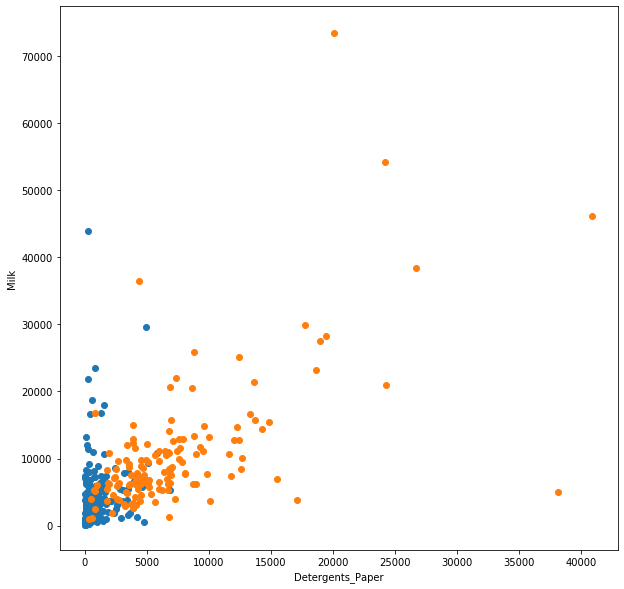

In [12]:
# we can plot the two classes

df_one = df.loc[df['Channel'] == 1]
df_two = df.loc[df['Channel'] == 2]
fix, ax = plt.subplots(figsize=(10,10))
# we are going to use 'Detergents_Paper' and 'Milk' as
ax.scatter(df_one['Detergents_Paper'], df_one['Milk'])
ax.scatter(df_two['Detergents_Paper'], df_two['Milk'])
ax.set(xlabel = 'Detergents_Paper', ylabel = 'Milk')

In [13]:
from sklearn.model_selection import train_test_split

# let afeature 'Milk' and 'Detergents_Paper' be X
#X = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
X = df[[ 'Milk', 'Detergents_Paper']]
# let our channel label to be target y
y = df['Channel']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [14]:
X_train.head() # first five rows of training x

,Milk,Detergents_Paper
314,1795,857
3,1196,507
18,6327,2767
393,6730,385
60,3045,4095


In [15]:
print(y_test)

265    1
78     1
347    2
255    1
327    1
291    1
184    1
82     2
438    1
405    1
227    1
75     1
218    2
397    1
342    1
76     1
434    1
193    2
73     2
154    1
9      2
176    1
30     1
192    1
104    1
132    1
70     1
220    1
425    1
55     1
      ..
246    1
116    1
427    1
57     2
137    1
24     2
17     1
66     1
266    2
294    1
31     1
84     2
301    2
400    1
94     2
408    2
431    1
153    1
395    1
168    1
296    1
5      2
45     2
421    2
430    1
378    1
417    1
16     2
406    1
117    1
Name: Channel, Length: 110, dtype: int64


In [16]:
# import our model and train it
from sklearn.svm import SVC

# we are going use linear kernel for this model,
# random_state set to the same number 42
svMachine = SVC(kernel = 'linear', gamma = 'auto', class_weight = 'balanced', random_state = 42)
svMachine.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [17]:
# let the model predicts  and show the results
y_pred = svMachine.predict(X_test)
y_pred

array([1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1],
      dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_test, y_pred)

array([[67, 11],
       [ 3, 29]], dtype=int64)

In [19]:
accuracy_score(y_test, y_pred) # our accuracy score 

0.8727272727272727

In [57]:
channel_class = df['Channel']


In [58]:
df['Channel'].value_counts()
# It appears that there are imbalanced data here. 
# There are nearly twice the number of class 1 compared to class 2

1    298
2    142
Name: Channel, dtype: int64

In [59]:
# we will randomly take 50% from class 1 as samples to balance the data.
df = df.drop(df.query('Channel == 1').sample(frac = 0.5).index)
df['Channel'].value_counts()

1    149
2    142
Name: Channel, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

# let afeature 'Milk' and 'Detergents_Paper' be X
#X = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
X = df[[ 'Milk', 'Detergents_Paper']]
# let our channel label to be target y
y = df['Channel']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [61]:
X_train.head() # first five rows of training x

,Milk,Detergents_Paper
84,3327,3837
311,2335,371
46,14069,6792
18,6327,2767
436,1431,93


In [62]:
print(y_test)

103    1
379    2
55     1
255    1
200    2
170    2
333    2
159    2
9      2
110    1
209    2
412    1
42     2
421    2
335    2
94     2
56     2
5      2
337    1
386    1
166    2
347    2
418    2
132    1
92     2
437    2
410    1
143    1
73     2
301    2
      ..
224    1
264    2
38     2
25     2
28     2
415    2
160    2
357    2
97     1
19     1
250    1
315    2
256    1
266    2
240    1
6      2
312    2
323    1
319    2
89     1
29     1
152    1
211    2
88     1
21     1
155    2
120    1
16     2
10     2
101    2
Name: Channel, Length: 73, dtype: int64


In [63]:
# import our model and train it
from sklearn.svm import SVC

# we are going use linear kernel for this model,
# random_state set to the same number 42
svMachine = SVC(kernel = 'linear', gamma = 'auto', class_weight = 'balanced', random_state = 42)
svMachine.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [64]:
# let the model predicts  and show the results
y_pred = svMachine.predict(X_test)
y_pred

array([1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 2, 2, 2], dtype=int64)

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score

# we are going to use confusion matrix to see the correct predicts and wrongs
# we have 24 correct class 1 prediction, 37 correct class 2 prediciton
confusion_matrix(y_test, y_pred)

array([[27,  4],
       [ 2, 40]], dtype=int64)

In [66]:
accuracy_score(y_test, y_pred) # our accuracy score 

0.9178082191780822